In [1]:
#importing libraries
import pandas as pd
import datetime

#reading in tweet csv files and converting to dfs
tweet_df = pd.read_csv("../Resources/tweet.csv")
co_df = pd.read_csv("../Resources/company.csv")
co_twt_df = pd.read_csv("../Resources/company_tweet.csv")

#reading in stock csv and converting to dfs
go_df =pd.read_csv("../Resources/GOOG.csv")
ap_df =pd.read_csv("../Resources/AAPL.csv")
am_df =pd.read_csv("../Resources/AMZN.csv")
ts_df =pd.read_csv("../Resources/TSLA.csv")
ms_df =pd.read_csv("../Resources/MSFT.csv")

In [2]:
#removing all the googl ticker rows
co_twt= co_twt_df[co_twt_df.ticker_symbol !="GOOGL"]


In [3]:
#checking to see if googl ticker is gone
co_twt.ticker_symbol.unique()


array(['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA'], dtype=object)

In [4]:
#merging company tweet, and tweet dfs on "tweet_id"
merged_df = pd.merge(co_twt,tweet_df, on="tweet_id")
#merged_df.info

# exploring merged data, seperating each stock into its own df

In [5]:
merged_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803225113157632,AAPL,MacHashNews,1420156696,Rumor Roundup: What to expect when you're expe...,0,0,0


In [6]:
#converting unix epoch to date format similar
merged_df["post_date"] = pd.to_datetime(tweet_df["post_date"], unit='s').dt.strftime('%d-%m-%Y')
merged_df.tail()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
4008871,1212158772015034369,TSLA,StockJoke,NaN,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0
4008872,1212159099632267268,TSLA,sweetog76,NaN,$TSLA Very Interesting dude:,0,0,0
4008873,1212159184931717120,TSLA,MelaynaLokosky,NaN,If only 2020 brought more self-awareness to Te...,0,1,0
4008874,1212159838882533376,TSLA,ShortingIsFun,NaN,In 2020 I may start Tweeting out positive news...,0,0,1
4008875,1212160015332728833,TSLA,Commuternyc,NaN,Patiently Waiting for the no twitter sitter tw...,0,0,5


In [7]:
#exploring merged df for null values and noticed a few in postdate.
merged_df.sample(20)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
2734646,1179169124997451776,AMZN,newsfilterio,24-09-2018,$JPM $AMZN Forever 21 filed for Chapter 11 ban...,0,0,0
252099,623577541153017856,AAPL,golcate1247,29-04-2015,"$AAPL STRADLE ON, LETS GO BABY!",0,0,1
1415159,1055435610092195842,GOOG,zerofiltertruth,20-10-2016,$TWTR Still top-3 position here $SOCL $QQQ ...,0,0,0
1941991,747492024073359360,GOOG,It_c0nsulting,26-07-2017,#Google Use Android apps on HP's upcoming $18...,0,0,0
3538385,1035159076865486848,TSLA,bostonlovinlife,26-09-2019,How does one get honest views of $TSLA....the ...,3,1,13
2202112,624326887611838465,AMZN,alisonsouthwick,09-01-2018,"""Holy Cow,"" so says the ever-eloquent @tmfjmo ...",0,2,3
3315947,914891212225642496,TSLA,iliketeslas,22-05-2019,Congratulations @elonmusk @Tesla https://elec...,0,0,1
410290,674948345324957696,AMZN,StockWebTrading,15-07-2015,$AAPL $AMAT $AMGN $AMTD $AMZN $ATVI Trade long...,0,0,0
2781010,603198000937213952,MSFT,ADVFNplc,09-10-2018,$MSFT - 2 Upcoming Moves That Could Revitalize...,0,0,0
1903829,704439669182873604,GOOG,DeweyKnows,06-07-2017,Some fresh #FANG analysis = $GOOG $FB $AMZN $N...,0,0,2


In [8]:
#checking values before dropping null values
merged_df.count()

tweet_id         4008876
ticker_symbol    4008876
writer           3955885
post_date        3717964
body             4008876
comment_num      4008876
retweet_num      4008876
like_num         4008876
dtype: int64

In [9]:
#dropping null values
merged_df = merged_df.dropna()

In [10]:
#checking values/count after dropping null values
merged_df.count()

tweet_id         3673064
ticker_symbol    3673064
writer           3673064
post_date        3673064
body             3673064
comment_num      3673064
retweet_num      3673064
like_num         3673064
dtype: int64

In [11]:
merged_df.sample(20)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
2800606,671140549408251904,MSFT,itassessors,18-10-2018,"From best CEO to best new gadget, check out th...",0,0,1
1141991,931311219205726210,AMZN,ChrisJVersace,01-07-2016,On this weeks #podcast @EllesEconomy and I bre...,0,2,1
625468,734426207601598464,GOOG,chamath,23-10-2015,"8/ On every metric I use, I can't own $AAPL wi...",5,15,64
633632,736188061634170882,TSLA,TradingGuru,27-10-2015,"RT $NFLX HFT Algos triggered BUY in SIGMA-X, C...",0,0,0
903708,817477683428761601,AAPL,_peripherals,23-03-2016,#Apple Mac's share falls to five-year low. Rea...,0,0,0
3345345,941355110478774272,TSLA,Cycle_System,04-06-2019,$TSLA Our key level for defining risk was $342...,0,0,0
2975831,1001818369920786432,MSFT,KoyfinCharts,07-01-2019,fun fact: $MSFT p/e doubled since @satyanadell...,0,0,5
1285349,992416363623919616,AAPL,michaelbozzello,01-09-2016,May the 4th be with you. $AAPL $BRK.A,1,0,1
3382349,981243166987825152,TSLA,TalkMarkets,25-06-2019,Tesla Rises After 'Good Enough' Update Include...,0,0,0
753287,773316403126538240,AAPL,EconCalend,15-01-2016,Apple Stock (AAPL) Consolidates Ahead of Flags...,0,0,0


In [12]:
merged_df.dtypes

tweet_id          int64
ticker_symbol    object
writer           object
post_date        object
body             object
comment_num       int64
retweet_num       int64
like_num          int64
dtype: object

In [13]:
merged_df.describe()

,tweet_id,comment_num,retweet_num,like_num
count,3.673064e+06,3.673064e+06,3.673064e+06,3.673064e+06
mean,8.633711e+17,2.363708e-01,5.772622e-01,1.559727e+00
std,1.843315e+17,1.490722e+00,6.952183e+00,1.014828e+01
min,5.504415e+17,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.102460e+17,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.526335e+17,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.027916e+18,0.000000e+00,0.000000e+00,1.000000e+00
max,1.212160e+18,6.310000e+02,9.990000e+02,9.990000e+02


In [14]:
merged_df

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,01-01-2015,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,01-01-2015,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,01-01-2015,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,AMZN,SentiQuant,01-01-2015,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803225113157632,AAPL,MacHashNews,01-01-2015,Rumor Roundup: What to expect when you're expe...,0,0,0
...,...,...,...,...,...,...,...,...
3717959,1100674460158492673,TSLA,ChrisMarsch,31-12-2019,"""Sure, the car will sell well for this price a...",0,0,1
3717960,1100675821608599552,TSLA,Stefan_Hajek,31-12-2019,Buy or sell ? @Tesla $Tsla,2,1,2
3717961,1100677890805506048,TSLA,gebbyart,31-12-2019,$TSLA can Musk go to court to challenge any fi...,3,0,0
3717962,1100677959898316801,TSLA,MStradeur,31-12-2019,The ultimate FU to shorts would be if Elon got...,2,0,0


In [15]:
#creating a df to check low impact tweets, whether or not to include them.
check_low_values = merged_df[(merged_df['comment_num']==0) & (merged_df['retweet_num']==0) & (merged_df['like_num']==0)]

In [16]:
#roughly 2/3s of the data has zero across comments,like,retweets.
check_low_values

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
4,550803225113157632,AAPL,MacHashNews,01-01-2015,Rumor Roundup: What to expect when you're expe...,0,0,0
6,550802855129382912,AAPL,2waystrading,01-01-2015,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0
7,550802745737768960,AAPL,TV_TradingIdeas,01-01-2015,Will $AAPL Give Second entry opportunity? $AAP...,0,0,0
9,550797275786518528,AAPL,Chasing__Stars,01-01-2015,"$HMCP Opinions Updated Thursday, January 1, 20...",0,0,0
10,550797272686923776,AAPL,Chasing__Stars,01-01-2015,"$OPXS Company Info Updated Thursday, January 1...",0,0,0
...,...,...,...,...,...,...,...,...
3717943,1100660930952728576,TSLA,teslacito,31-12-2019,Tomorrow brings a steamer! $tsla #ElonMusk #Te...,0,0,0
3717945,1100661716092739585,TSLA,gbassakos,31-12-2019,Repeat. $TSLA is not a car. Stop referring to ...,0,0,0
3717954,1100672774413144064,TSLA,LukeMcDuke,31-12-2019,Some Tesla news,0,0,0
3717956,1100673898125742082,TSLA,Seamus_Mullan,31-12-2019,If you’re holding bags on $tsla you’re a crap ...,0,0,0


In [17]:
# could possibly create a function to create each associated stock df
#def parse_df 

In [18]:
#variable for changing date/count columns
date_titles = ["Date","tweet_count"]

In [19]:
ap_tweet = merged_df[(merged_df['ticker_symbol']=="AAPL")]
ap_tweet

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,01-01-2015,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,01-01-2015,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803225113157632,AAPL,MacHashNews,01-01-2015,Rumor Roundup: What to expect when you're expe...,0,0,0
5,550802957370159104,AAPL,WaltLightShed,01-01-2015,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4
6,550802855129382912,AAPL,2waystrading,01-01-2015,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0
...,...,...,...,...,...,...,...,...
1790559,1212159254884433921,AAPL,QuantWolfLine,02-05-2017,Imagine calling your broker-dealer and wanting...,1,0,1
1790560,1212159275637886976,AAPL,GMGRIFF_79,02-05-2017,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1
1790561,1212159765914079234,AAPL,TEEELAZER,02-05-2017,That $SPY $SPX puuump in the last hour was the...,1,0,6
1790562,1212160410692046849,AAPL,MoriaCrypto,02-05-2017,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [20]:
#creading df of tweets per day to merge with stock dfs
ap_count = pd.DataFrame(ap_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
ap_count.columns=date_titles
ap_count

,Date,tweet_count
0,13-06-2016,5262
1,21-03-2016,5186
2,21-07-2015,5185
3,27-04-2015,5106
4,27-01-2015,4983
...,...,...
848,26-02-2017,353
849,19-03-2017,338
850,29-05-2016,290
851,22-08-2015,240


In [21]:
am_tweet = merged_df[(merged_df["ticker_symbol"]=="AMZN")]
am_tweet

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
1,550803612197457920,AMZN,SentiQuant,01-01-2015,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
3,550803610825928706,AMZN,SentiQuant,01-01-2015,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
43,550780769497808896,AMZN,SharePlanner,01-01-2015,2014 Was A Great Year of Trading In The Splash...,1,0,1
56,550773410742403072,AMZN,SentiQuant,01-01-2015,#TOPTICKERTWEETS $IMRS $AAPL $BABA $EBAY $AMZN...,0,0,0
93,550743209971036161,AMZN,SentiQuant,01-01-2015,#TOPTICKERTWEETS $AAPL $BABA $EBAY $IMRS $AMZN...,0,0,1
...,...,...,...,...,...,...,...,...
2761790,1212153821515931650,AMZN,TopStockAlerts1,02-10-2018,$AMZN Amazon Stock Broke Out -- and Hesitated;...,0,0,0
2761791,1212154334600818689,AMZN,thequ4nt,02-10-2018,"[Yahoo Finance Video - December 31, 2019] $AMZ...",0,1,1
2761792,1212155226377117697,AMZN,DentonBlackwell,02-10-2018,@Ryzenn $AAPL has to have a lights out ER to k...,0,0,1
2761793,1212156775178416128,AMZN,ITRADEVOL,02-10-2018,Is there a public database or website where I ...,0,0,2


In [22]:
#creading df of tweets per day to merge with stock dfs
am_count = pd.DataFrame(am_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
am_count.columns=date_titles
am_count

,Date,tweet_count
0,07-08-2018,7082
1,01-08-2018,5595
2,08-08-2018,5087
3,02-08-2018,4959
4,28-09-2018,4778
...,...,...
1366,18-01-2016,5
1367,20-01-2015,3
1368,21-02-2015,3
1369,07-11-2015,2


In [23]:
go_tweet = merged_df[(merged_df["ticker_symbol"]=="GOOG")]
go_tweet

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
42,550780769497808896,GOOG,SharePlanner,01-01-2015,2014 Was A Great Year of Trading In The Splash...,1,0,1
60,550771969789267968,GOOG,GiveBack2011,01-01-2015,@BenedictEvans Great one. $GOOG at risk from $...,1,0,0
123,550719478963929088,GOOG,Stockaholics,01-01-2015,Our Penny Stock Picks Gained Over 968% In the ...,0,0,0
142,550703624544718848,GOOG,laurenholmesNYC,01-01-2015,Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...,0,1,2
148,550699059280101377,GOOG,Theonemicshow1,01-01-2015,Apple: Asian Carriers Are Making iPhone 6 Chea...,0,0,1
...,...,...,...,...,...,...,...,...
2150391,1212145324296458241,GOOG,tradeoilstocks,29-11-2017,$fb $amzn $goog $nflx? Should have an acronym ...,0,0,0
2150392,1212145509579837440,GOOG,econalert,29-11-2017,"$GOOG #patent 10,524,006 Automatic transition ...",0,1,0
2150393,1212146656335949824,GOOG,SVPR_Sweetheart,29-11-2017,I'm banking on this and that Google will still...,0,0,1
2150394,1212154645981941760,GOOG,TopStockAlerts1,29-11-2017,"Bold Moves Google, Apple, Facebook and Other T...",0,0,0


In [24]:
#test to merge stock data and tweet data, 
#go_tweet.rename({"post_date":"Date"}, axis=1)

In [25]:
#creading df of tweets per day to merge with stock dfs
go_count = pd.DataFrame(go_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
go_count.columns=date_titles
go_count

,Date,tweet_count
0,16-06-2017,4940
1,02-08-2017,4215
2,01-08-2017,3570
3,27-07-2017,3020
4,06-07-2017,2907
...,...,...
1059,24-05-2015,6
1060,11-10-2015,3
1061,18-01-2016,3
1062,03-04-2016,1


In [26]:
ms_tweet = merged_df[(merged_df["ticker_symbol"]=="MSFT")]
ms_tweet

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
72,550756325253455872,MSFT,LongbetCapital,01-01-2015,RT @theinformation: Apple products are getting...,0,0,2
107,550731345614602240,MSFT,TalkMarkets,01-01-2015,Gappy New Year! $SPY $DIA $IWM $INTC $MSFT $AA...,0,0,1
115,550726427164020737,MSFT,TalkMarkets,01-01-2015,3 #Technology #Stocks That Crushed #Apple In 2...,0,0,2
134,550706228888756224,MSFT,investcorrectly,01-01-2015,Key Tech Highlights Of 2014 $AAPL $BBRY $BB $M...,0,0,1
137,550705849690116096,MSFT,SwingTradeAlert,01-01-2015,IBD:2015 technology forecasts: Wearable techno...,0,0,3
...,...,...,...,...,...,...,...,...
3040362,1212131912585826305,MSFT,robintrack,03-02-2019,Top increases in popularity for stocks held by...,0,0,2
3040363,1212145214736875520,MSFT,MarketCurrents,03-02-2019,"$AAPL $MSFT $JPM - Apple, Microsoft top Dow 20...",0,0,2
3040364,1212146425607413761,MSFT,SentimEntropy,03-02-2019,Notable activity on social media recently for$...,0,0,0
3040366,1212149780471853057,MSFT,harveyrosenblum,03-02-2019,If this continues then the market will be enti...,0,0,2


In [27]:
#creading df of tweets per day to merge with stock dfs
ms_count = pd.DataFrame(ms_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
ms_count.columns=date_titles
ms_count

,Date,tweet_count
0,03-01-2019,6564
1,30-01-2019,5606
2,26-10-2018,4947
3,25-10-2018,4888
4,24-10-2018,4868
...,...,...
1487,06-09-2015,3
1488,24-12-2017,3
1489,30-12-2017,3
1490,29-12-2017,3


In [28]:
ts_tweet = merged_df[(merged_df["ticker_symbol"]=="TSLA")]
ts_tweet

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
17,550793298357391360,TSLA,ScoutingGW,01-01-2015,"#bluechips like $TSLA, $AAPL, $DIS, $TWTR & NV...",0,0,3
44,550780769497808896,TSLA,SharePlanner,01-01-2015,2014 Was A Great Year of Trading In The Splash...,1,0,1
143,550703624544718848,TSLA,laurenholmesNYC,01-01-2015,Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...,0,1,2
191,550676585393569792,TSLA,laurenholmesNYC,01-01-2015,$AAPL $ARWR $TSLA $BABA Wish everyone happy ne...,0,1,1
201,550673738161610752,TSLA,laurenholmesNYC,01-01-2015,$AAPL $TSLA $GILD $CELG $BABA $SCTY $RIG $WFM ...,0,1,1
...,...,...,...,...,...,...,...,...
3717959,1100674460158492673,TSLA,ChrisMarsch,31-12-2019,"""Sure, the car will sell well for this price a...",0,0,1
3717960,1100675821608599552,TSLA,Stefan_Hajek,31-12-2019,Buy or sell ? @Tesla $Tsla,2,1,2
3717961,1100677890805506048,TSLA,gebbyart,31-12-2019,$TSLA can Musk go to court to challenge any fi...,3,0,0
3717962,1100677959898316801,TSLA,MStradeur,31-12-2019,The ultimate FU to shorts would be if Elon got...,2,0,0


In [29]:
#creading df of tweets per day to merge with stock dfs
ts_count = pd.DataFrame(ts_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
ts_count.columns=date_titles
ts_count

,Date,tweet_count
0,04-04-2019,5394
1,24-10-2019,5140
2,24-04-2019,4956
3,25-10-2019,4786
4,15-03-2019,4715
...,...,...
1813,25-11-2018,1
1814,27-10-2018,1
1815,04-11-2018,1
1816,06-09-2015,1


# checking the stock dataframes now

In [30]:
go_df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
4248,06-07-2021,2568.179932,2588.989990,1067500,2597.689941,2595.419922,2595.419922
4249,07-07-2021,2595.199951,2606.820068,834000,2612.798096,2601.550049,2601.550049
4250,08-07-2021,2560.800049,2565.000000,989000,2600.649902,2583.540039,2583.540039
4251,09-07-2021,2578.870117,2578.889893,755300,2596.989990,2591.489990,2591.489990
4252,12-07-2021,2592.000000,2596.669922,736910,2615.399902,2611.280029,2611.280029


In [31]:
go_df.dtypes

Date               object
Low               float64
Open              float64
Volume              int64
High              float64
Close             float64
Adjusted Close    float64
dtype: object

In [32]:
go_test = pd.merge(go_df, go_count, on='Date')
go_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count
0,02-01-2015,522.665039,527.561584,1447563,529.815369,523.373108,523.373108,134
1,05-01-2015,511.655243,521.827332,2059840,522.894409,512.463013,512.463013,245
2,06-01-2015,499.678131,513.589966,2899940,514.761719,500.585632,500.585632,222
3,07-01-2015,498.281952,505.611847,2065054,505.855164,499.727997,499.727997,157
4,08-01-2015,489.655640,496.626526,3353582,502.101471,501.303680,501.303680,279
...,...,...,...,...,...,...,...,...
729,22-11-2017,1031.430054,1035.000000,746300,1039.706055,1035.959961,1035.959961,1090
730,24-11-2017,1035.000000,1035.869995,537000,1043.177979,1040.609985,1040.609985,994
731,27-11-2017,1038.439941,1040.000000,1307900,1055.459961,1054.209961,1054.209961,1327
732,28-11-2017,1040.000000,1055.089966,1424400,1062.375000,1047.410034,1047.410034,1362


In [57]:
go_test["Ticker"] = "GOOG"
go_test['Percent Change'] = ((go_test["Close"]-go_test["Open"])/go_test["Open"])*100
go_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Percent Change,Ticker
0,02-01-2015,522.665039,527.561584,1447563,529.815369,523.373108,523.373108,134,-0.793931,GOOG
1,05-01-2015,511.655243,521.827332,2059840,522.894409,512.463013,512.463013,245,-1.794524,GOOG
2,06-01-2015,499.678131,513.589966,2899940,514.761719,500.585632,500.585632,222,-2.532046,GOOG
3,07-01-2015,498.281952,505.611847,2065054,505.855164,499.727997,499.727997,157,-1.163709,GOOG
4,08-01-2015,489.655640,496.626526,3353582,502.101471,501.303680,501.303680,279,0.941785,GOOG
...,...,...,...,...,...,...,...,...,...,...
729,22-11-2017,1031.430054,1035.000000,746300,1039.706055,1035.959961,1035.959961,1090,0.092750,GOOG
730,24-11-2017,1035.000000,1035.869995,537000,1043.177979,1040.609985,1040.609985,994,0.457585,GOOG
731,27-11-2017,1038.439941,1040.000000,1307900,1055.459961,1054.209961,1054.209961,1327,1.366342,GOOG
732,28-11-2017,1040.000000,1055.089966,1424400,1062.375000,1047.410034,1047.410034,1362,-0.727894,GOOG


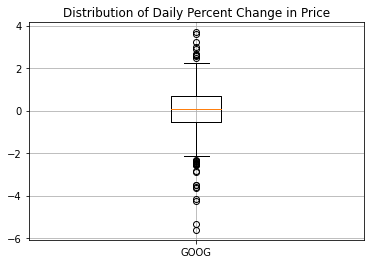

In [80]:
# Create Boxplot 

import matplotlib.pyplot as plt

x_labels =["GOOG"]
fig, ax = plt.subplots()
ax.boxplot(go_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [33]:
#noticed apple dates are not uniform
ap_df.tail(20)


,Date,Low,Open,Volume,High,Close,Adjusted Close
10211,14-06-2021,127.070000,127.820000,96906500,130.539993,130.479996,130.479996
10212,15-06-2021,129.389999,129.940002,62746300,130.600006,129.639999,129.639999
10213,16-06-2021,128.460007,130.369995,91815000,130.889999,130.149994,130.149994
10214,17-06-2021,129.649994,129.800003,96721700,132.550003,131.789993,131.789993
10215,18-06-2021,130.240005,130.710007,108953300,131.509995,130.460007,130.460007
10216,21-06-2021,129.210007,130.300003,79663300,132.410004,132.300003,132.300003
10217,22-06-2021,131.619995,132.130005,74783600,134.080002,133.979996,133.979996
10218,23-06-2021,133.229996,133.770004,60214200,134.320007,133.699997,133.699997
10219,24-06-2021,132.929993,134.449997,68711000,134.639999,133.410004,133.410004
10220,25-06-2021,132.809998,133.460007,70783700,133.889999,133.110001,133.110001


In [34]:
#making all dates uniform
ap_df["Date"] = pd.to_datetime(ap_df["Date"]).dt.strftime("%d-%m-%Y")


In [35]:
ap_df.tail(20)

,Date,Low,Open,Volume,High,Close,Adjusted Close
10211,14-06-2021,127.070000,127.820000,96906500,130.539993,130.479996,130.479996
10212,15-06-2021,129.389999,129.940002,62746300,130.600006,129.639999,129.639999
10213,16-06-2021,128.460007,130.369995,91815000,130.889999,130.149994,130.149994
10214,17-06-2021,129.649994,129.800003,96721700,132.550003,131.789993,131.789993
10215,18-06-2021,130.240005,130.710007,108953300,131.509995,130.460007,130.460007
10216,21-06-2021,129.210007,130.300003,79663300,132.410004,132.300003,132.300003
10217,22-06-2021,131.619995,132.130005,74783600,134.080002,133.979996,133.979996
10218,23-06-2021,133.229996,133.770004,60214200,134.320007,133.699997,133.699997
10219,24-06-2021,132.929993,134.449997,68711000,134.639999,133.410004,133.410004
10220,25-06-2021,132.809998,133.460007,70783700,133.889999,133.110001,133.110001


In [36]:
ap_df.dtypes
ap_test = pd.merge(ap_df, ap_count, on='Date')
ap_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count
0,01-02-2015,26.837500,27.847500,212818400,27.860001,27.332500,24.819241,636
1,01-05-2015,26.352501,27.072500,257142000,27.162500,26.562500,24.120045,2717
2,01-06-2015,26.157499,26.635000,263188400,26.857500,26.565001,24.122320,2093
3,01-07-2015,26.674999,26.799999,160423600,27.049999,26.937500,24.460564,1813
4,01-08-2015,27.174999,27.307501,237458000,28.037500,27.972500,25.400398,1258
...,...,...,...,...,...,...,...,...
579,11-01-2017,41.402500,42.467499,134551200,42.485001,41.722500,39.878925,1784
580,11-02-2017,41.320000,41.650002,165573600,42.125000,42.027500,40.170452,479
581,11-03-2017,42.779999,43.500000,237594400,43.564999,43.125000,41.219452,506
582,12-01-2017,42.125000,42.487499,159037200,42.917500,42.762501,41.019905,2105


In [58]:
ap_test["Ticker"] = "AAPL"
ap_test['Percent Change'] = ((ap_test["Close"]-ap_test["Open"])/ap_test["Open"])*100
ap_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,01-02-2015,26.837500,27.847500,212818400,27.860001,27.332500,24.819241,636,AAPL,-1.849356
1,01-05-2015,26.352501,27.072500,257142000,27.162500,26.562500,24.120045,2717,AAPL,-1.883831
2,01-06-2015,26.157499,26.635000,263188400,26.857500,26.565001,24.122320,2093,AAPL,-0.262811
3,01-07-2015,26.674999,26.799999,160423600,27.049999,26.937500,24.460564,1813,AAPL,0.513063
4,01-08-2015,27.174999,27.307501,237458000,28.037500,27.972500,25.400398,1258,AAPL,2.435225
...,...,...,...,...,...,...,...,...,...,...
579,11-01-2017,41.402500,42.467499,134551200,42.485001,41.722500,39.878925,1784,AAPL,-1.754280
580,11-02-2017,41.320000,41.650002,165573600,42.125000,42.027500,40.170452,479,AAPL,0.906359
581,11-03-2017,42.779999,43.500000,237594400,43.564999,43.125000,41.219452,506,AAPL,-0.862069
582,12-01-2017,42.125000,42.487499,159037200,42.917500,42.762501,41.019905,2105,AAPL,0.647253


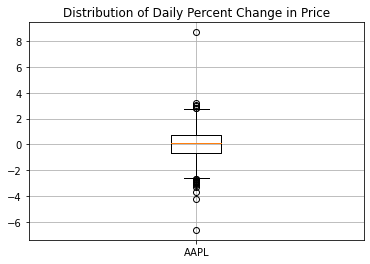

In [81]:
x_labels =["AAPL"]
fig, ax = plt.subplots()
ax.boxplot(ap_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [37]:
am_df.tail(20)

,Date,Low,Open,Volume,High,Close,Adjusted Close
6059,14-06-2021,3335.500000,3346.830078,2569700,3385.000000,3383.870117,3383.870117
6060,15-06-2021,3363.110107,3384.000000,2426200,3396.989990,3383.129883,3383.129883
6061,16-06-2021,3360.530029,3392.000000,4202800,3426.350098,3415.250000,3415.250000
6062,17-06-2021,3401.000000,3403.179932,5136500,3497.199951,3489.239990,3489.239990
6063,18-06-2021,3473.709961,3479.989990,5247700,3507.000000,3486.899902,3486.899902
6064,21-06-2021,3434.000000,3476.419922,3277100,3482.000000,3453.959961,3453.959961
6065,22-06-2021,3456.090088,3458.060059,3345100,3523.780029,3505.439941,3505.439941
6066,23-06-2021,3483.199951,3505.000000,2813300,3521.000000,3503.820068,3503.820068
6067,24-06-2021,3430.850098,3507.639893,3832000,3524.860107,3449.080078,3449.080078
6068,25-06-2021,3394.179932,3464.000000,3941000,3464.820068,3401.459961,3401.459961


In [38]:
am_df.dtypes
am_test = pd.merge(am_df, am_count, on='Date')
am_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count
0,02-01-2015,306.959991,312.579987,2783200,314.750000,308.519989,308.519989,32
1,05-01-2015,300.850006,307.010010,2774200,308.380005,302.190002,302.190002,35
2,06-01-2015,292.380005,302.239990,3519000,303.000000,295.290009,295.290009,43
3,07-01-2015,295.329987,297.500000,2640300,301.279999,298.420013,298.420013,31
4,08-01-2015,296.109985,300.320007,3088400,303.140015,300.459991,300.459991,73
...,...,...,...,...,...,...,...,...
940,26-09-2018,1961.520020,1968.500000,4313500,1995.250000,1974.849976,1974.849976,1860
941,27-09-2018,1988.579956,1993.239990,4329400,2016.160034,2012.979980,2012.979980,3561
942,28-09-2018,1996.459961,2004.410034,4085100,2026.520020,2003.000000,2003.000000,4778
943,01-10-2018,2003.599976,2021.989990,3460500,2033.189941,2004.359985,2004.359985,3193


In [59]:
am_test["Ticker"] = "AMZN"
am_test['Percent Change'] = ((am_test["Close"]-am_test["Open"])/am_test["Open"])*100
am_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,02-01-2015,306.959991,312.579987,2783200,314.750000,308.519989,308.519989,32,AMZN,-1.298867
1,05-01-2015,300.850006,307.010010,2774200,308.380005,302.190002,302.190002,35,AMZN,-1.569984
2,06-01-2015,292.380005,302.239990,3519000,303.000000,295.290009,295.290009,43,AMZN,-2.299491
3,07-01-2015,295.329987,297.500000,2640300,301.279999,298.420013,298.420013,31,AMZN,0.309248
4,08-01-2015,296.109985,300.320007,3088400,303.140015,300.459991,300.459991,73,AMZN,0.046612
...,...,...,...,...,...,...,...,...,...,...
940,26-09-2018,1961.520020,1968.500000,4313500,1995.250000,1974.849976,1974.849976,1860,AMZN,0.322579
941,27-09-2018,1988.579956,1993.239990,4329400,2016.160034,2012.979980,2012.979980,3561,AMZN,0.990347
942,28-09-2018,1996.459961,2004.410034,4085100,2026.520020,2003.000000,2003.000000,4778,AMZN,-0.070347
943,01-10-2018,2003.599976,2021.989990,3460500,2033.189941,2004.359985,2004.359985,3193,AMZN,-0.871914


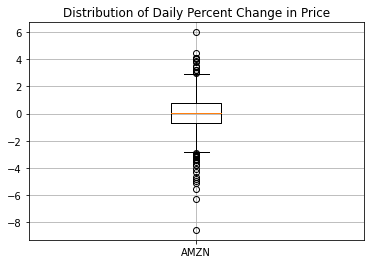

In [82]:
x_labels =["AMZN"]
fig, ax = plt.subplots()
ax.boxplot(am_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [39]:
ms_df.sample(20)

,Date,Low,Open,Volume,High,Close,Adjusted Close
4135,31-07-2002,23.180000,23.805000,93875600,24.000000,23.990000,15.202160
6298,03-03-2011,26.180000,26.260000,68271500,26.400000,26.200001,20.857637
7724,31-10-2016,59.919998,60.160000,26434700,60.419998,59.919998,55.545841
4812,08-04-2005,24.910000,25.070000,47956300,25.250000,24.940001,17.877562
5662,22-08-2008,27.219999,27.230000,47930400,27.879999,27.840000,20.946999
1393,16-09-1991,1.713542,1.729167,21686400,1.739583,1.729167,1.095751
1103,24-07-1990,0.927083,1.006944,137100800,1.006944,0.965278,0.611684
2559,25-04-1996,6.890625,6.968750,63896000,7.109375,7.046875,4.465516
4910,26-08-2005,26.870001,27.059999,36774600,27.080000,26.969999,19.451572
7099,09-05-2014,39.369999,39.540001,29647600,39.849998,39.540001,34.287125


In [40]:
ms_df.dtypes
ms_test = pd.merge(ms_df, ms_count, on='Date')
ms_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count
0,02-01-2015,46.540001,46.660000,27913900,47.419998,46.759998,41.348206,28
1,05-01-2015,46.250000,46.369999,39673900,46.730000,46.330002,40.967976,32
2,06-01-2015,45.540001,46.380001,36447900,46.750000,45.650002,40.366688,17
3,07-01-2015,45.490002,45.980000,29114100,46.459999,46.230000,40.879539,17
4,08-01-2015,46.720001,46.750000,29645200,47.750000,47.590000,42.082142,31
...,...,...,...,...,...,...,...,...
1023,28-01-2019,104.660004,106.260002,29476700,106.480003,105.080002,101.992508,2429
1024,29-01-2019,102.169998,104.879997,31490500,104.970001,102.940002,99.915382,3504
1025,30-01-2019,104.330002,104.620003,49471900,106.379997,106.379997,103.254318,5606
1026,31-01-2019,103.180000,103.800003,55636400,105.220001,104.430000,101.361595,2036


In [60]:
ms_test["Ticker"] = "MSFT"
ms_test['Percent Change'] = ((ms_test["Close"]-ms_test["Open"])/ms_test["Open"])*100
ms_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,02-01-2015,46.540001,46.660000,27913900,47.419998,46.759998,41.348206,28,MSFT,0.214313
1,05-01-2015,46.250000,46.369999,39673900,46.730000,46.330002,40.967976,32,MSFT,-0.086256
2,06-01-2015,45.540001,46.380001,36447900,46.750000,45.650002,40.366688,17,MSFT,-1.573953
3,07-01-2015,45.490002,45.980000,29114100,46.459999,46.230000,40.879539,17,MSFT,0.543715
4,08-01-2015,46.720001,46.750000,29645200,47.750000,47.590000,42.082142,31,MSFT,1.796792
...,...,...,...,...,...,...,...,...,...,...
1023,28-01-2019,104.660004,106.260002,29476700,106.480003,105.080002,101.992508,2429,MSFT,-1.110484
1024,29-01-2019,102.169998,104.879997,31490500,104.970001,102.940002,99.915382,3504,MSFT,-1.849728
1025,30-01-2019,104.330002,104.620003,49471900,106.379997,106.379997,103.254318,5606,MSFT,1.682273
1026,31-01-2019,103.180000,103.800003,55636400,105.220001,104.430000,101.361595,2036,MSFT,0.606934


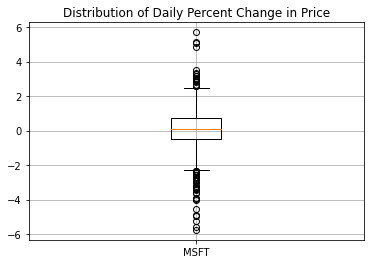

In [83]:
x_labels =["MSFT"]
fig, ax = plt.subplots()
ax.boxplot(ms_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [41]:
ts_df.sample(20)

,Date,Low,Open,Volume,High,Close,Adjusted Close
743,12-06-2013,19.150000,19.360001,45963500,20.096001,19.546000,19.546000
863,02-12-2013,24.785999,25.270000,38756000,25.709999,24.834000,24.834000
1728,10-05-2017,63.624001,64.311996,28708000,65.099998,65.043999,65.043999
2526,13-07-2020,294.221985,331.799988,38985400,358.997986,299.411987,299.411987
1998,06-06-2018,59.495998,60.099998,93836500,64.433998,63.900002,63.900002
2156,23-01-2019,56.338001,58.500000,62650000,58.900002,57.518002,57.518002
33,16-08-2010,3.652000,3.690000,2429000,3.760000,3.756000,3.756000
446,04-04-2012,6.938000,7.054000,22409000,7.098000,7.000000,7.000000
1157,03-02-2015,42.254002,42.644001,24131000,44.074001,43.672001,43.672001
1123,12-12-2014,40.900002,40.964001,35869000,42.335999,41.400002,41.400002


In [42]:
ts_df.dtypes
ts_test = pd.merge(ts_df, ts_count, on='Date')
ts_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count
0,02-01-2015,42.652000,44.574001,23822000,44.650002,43.862000,43.862000,28
1,05-01-2015,41.431999,42.910000,26842500,43.299999,42.018002,42.018002,56
2,06-01-2015,40.841999,42.012001,31309500,42.840000,42.256001,42.256001,56
3,07-01-2015,41.956001,42.669998,14842000,42.956001,42.189999,42.189999,27
4,08-01-2015,42.001999,42.562000,17212500,42.759998,42.124001,42.124001,103
...,...,...,...,...,...,...,...,...
1249,24-12-2019,82.538002,83.671997,40273500,85.094002,85.050003,85.050003,1836
1250,26-12-2019,85.269997,85.582001,53169500,86.695999,86.188004,86.188004,3013
1251,27-12-2019,85.222000,87.000000,49728500,87.061996,86.075996,86.075996,2581
1252,30-12-2019,81.851997,85.758003,62932000,85.800003,82.940002,82.940002,2511


In [61]:
ts_test["Ticker"] = "TSLA"
ts_test['Percent Change'] = ((ts_test["Close"]-ts_test["Open"])/ts_test["Open"])*100
ts_test

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,02-01-2015,42.652000,44.574001,23822000,44.650002,43.862000,43.862000,28,TSLA,-1.597348
1,05-01-2015,41.431999,42.910000,26842500,43.299999,42.018002,42.018002,56,TSLA,-2.078766
2,06-01-2015,40.841999,42.012001,31309500,42.840000,42.256001,42.256001,56,TSLA,0.580785
3,07-01-2015,41.956001,42.669998,14842000,42.956001,42.189999,42.189999,27,TSLA,-1.124911
4,08-01-2015,42.001999,42.562000,17212500,42.759998,42.124001,42.124001,103,TSLA,-1.029086
...,...,...,...,...,...,...,...,...,...,...
1249,24-12-2019,82.538002,83.671997,40273500,85.094002,85.050003,85.050003,1836,TSLA,1.646914
1250,26-12-2019,85.269997,85.582001,53169500,86.695999,86.188004,86.188004,3013,TSLA,0.708096
1251,27-12-2019,85.222000,87.000000,49728500,87.061996,86.075996,86.075996,2581,TSLA,-1.062073
1252,30-12-2019,81.851997,85.758003,62932000,85.800003,82.940002,82.940002,2511,TSLA,-3.285992


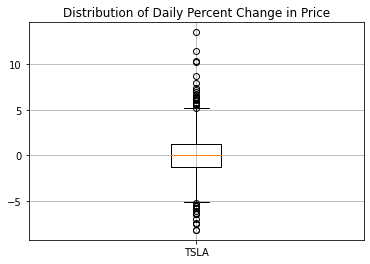

In [84]:
x_labels =["TSLA"]
fig, ax = plt.subplots()
ax.boxplot(ts_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

# saving transformed dataframes to csv

In [62]:
#google export to csv
go_test.to_csv('go_test.csv', index=False)



In [63]:
goog = pd.read_csv("go_test.csv")
goog

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Percent Change,Ticker
0,02-01-2015,522.665039,527.561584,1447563,529.815369,523.373108,523.373108,134,-0.793931,GOOG
1,05-01-2015,511.655243,521.827332,2059840,522.894409,512.463013,512.463013,245,-1.794524,GOOG
2,06-01-2015,499.678131,513.589966,2899940,514.761719,500.585632,500.585632,222,-2.532046,GOOG
3,07-01-2015,498.281952,505.611847,2065054,505.855164,499.727997,499.727997,157,-1.163709,GOOG
4,08-01-2015,489.655640,496.626526,3353582,502.101471,501.303680,501.303680,279,0.941785,GOOG
...,...,...,...,...,...,...,...,...,...,...
729,22-11-2017,1031.430054,1035.000000,746300,1039.706055,1035.959961,1035.959961,1090,0.092750,GOOG
730,24-11-2017,1035.000000,1035.869995,537000,1043.177979,1040.609985,1040.609985,994,0.457585,GOOG
731,27-11-2017,1038.439941,1040.000000,1307900,1055.459961,1054.209961,1054.209961,1327,1.366342,GOOG
732,28-11-2017,1040.000000,1055.089966,1424400,1062.375000,1047.410034,1047.410034,1362,-0.727894,GOOG


In [64]:
#apple export to csv

ap_test.to_csv('ap_test.csv', index=False)

In [65]:
appl = pd.read_csv("ap_test.csv")
appl

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,01-02-2015,26.837500,27.847500,212818400,27.860001,27.332500,24.819241,636,AAPL,-1.849356
1,01-05-2015,26.352501,27.072500,257142000,27.162500,26.562500,24.120045,2717,AAPL,-1.883831
2,01-06-2015,26.157499,26.635000,263188400,26.857500,26.565001,24.122320,2093,AAPL,-0.262811
3,01-07-2015,26.674999,26.799999,160423600,27.049999,26.937500,24.460564,1813,AAPL,0.513063
4,01-08-2015,27.174999,27.307501,237458000,28.037500,27.972500,25.400398,1258,AAPL,2.435225
...,...,...,...,...,...,...,...,...,...,...
579,11-01-2017,41.402500,42.467499,134551200,42.485001,41.722500,39.878925,1784,AAPL,-1.754280
580,11-02-2017,41.320000,41.650002,165573600,42.125000,42.027500,40.170452,479,AAPL,0.906359
581,11-03-2017,42.779999,43.500000,237594400,43.564999,43.125000,41.219452,506,AAPL,-0.862069
582,12-01-2017,42.125000,42.487499,159037200,42.917500,42.762501,41.019905,2105,AAPL,0.647253


In [66]:
#tesla export to csv
ts_test.to_csv('ts_test.csv', index=False)


In [67]:
tsla = pd.read_csv("ts_test.csv")
tsla

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,02-01-2015,42.652000,44.574001,23822000,44.650002,43.862000,43.862000,28,TSLA,-1.597348
1,05-01-2015,41.431999,42.910000,26842500,43.299999,42.018002,42.018002,56,TSLA,-2.078766
2,06-01-2015,40.841999,42.012001,31309500,42.840000,42.256001,42.256001,56,TSLA,0.580785
3,07-01-2015,41.956001,42.669998,14842000,42.956001,42.189999,42.189999,27,TSLA,-1.124911
4,08-01-2015,42.001999,42.562000,17212500,42.759998,42.124001,42.124001,103,TSLA,-1.029086
...,...,...,...,...,...,...,...,...,...,...
1249,24-12-2019,82.538002,83.671997,40273500,85.094002,85.050003,85.050003,1836,TSLA,1.646914
1250,26-12-2019,85.269997,85.582001,53169500,86.695999,86.188004,86.188004,3013,TSLA,0.708096
1251,27-12-2019,85.222000,87.000000,49728500,87.061996,86.075996,86.075996,2581,TSLA,-1.062073
1252,30-12-2019,81.851997,85.758003,62932000,85.800003,82.940002,82.940002,2511,TSLA,-3.285992


In [68]:
#microsoft export to csv
ms_test.to_csv('ms_test.csv', index=False)

In [69]:
msft = pd.read_csv("ms_test.csv")
msft

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,02-01-2015,46.540001,46.660000,27913900,47.419998,46.759998,41.348206,28,MSFT,0.214313
1,05-01-2015,46.250000,46.369999,39673900,46.730000,46.330002,40.967976,32,MSFT,-0.086256
2,06-01-2015,45.540001,46.380001,36447900,46.750000,45.650002,40.366688,17,MSFT,-1.573953
3,07-01-2015,45.490002,45.980000,29114100,46.459999,46.230000,40.879539,17,MSFT,0.543715
4,08-01-2015,46.720001,46.750000,29645200,47.750000,47.590000,42.082142,31,MSFT,1.796792
...,...,...,...,...,...,...,...,...,...,...
1023,28-01-2019,104.660004,106.260002,29476700,106.480003,105.080002,101.992508,2429,MSFT,-1.110484
1024,29-01-2019,102.169998,104.879997,31490500,104.970001,102.940002,99.915382,3504,MSFT,-1.849728
1025,30-01-2019,104.330002,104.620003,49471900,106.379997,106.379997,103.254318,5606,MSFT,1.682273
1026,31-01-2019,103.180000,103.800003,55636400,105.220001,104.430000,101.361595,2036,MSFT,0.606934


In [70]:
#amazon export to csv
am_test.to_csv('am_test.csv', index=False)

In [71]:
amzn = pd.read_csv("am_test.csv")
amzn

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_count,Ticker,Percent Change
0,02-01-2015,306.959991,312.579987,2783200,314.750000,308.519989,308.519989,32,AMZN,-1.298867
1,05-01-2015,300.850006,307.010010,2774200,308.380005,302.190002,302.190002,35,AMZN,-1.569984
2,06-01-2015,292.380005,302.239990,3519000,303.000000,295.290009,295.290009,43,AMZN,-2.299491
3,07-01-2015,295.329987,297.500000,2640300,301.279999,298.420013,298.420013,31,AMZN,0.309248
4,08-01-2015,296.109985,300.320007,3088400,303.140015,300.459991,300.459991,73,AMZN,0.046612
...,...,...,...,...,...,...,...,...,...,...
940,26-09-2018,1961.520020,1968.500000,4313500,1995.250000,1974.849976,1974.849976,1860,AMZN,0.322579
941,27-09-2018,1988.579956,1993.239990,4329400,2016.160034,2012.979980,2012.979980,3561,AMZN,0.990347
942,28-09-2018,1996.459961,2004.410034,4085100,2026.520020,2003.000000,2003.000000,4778,AMZN,-0.070347
943,01-10-2018,2003.599976,2021.989990,3460500,2033.189941,2004.359985,2004.359985,3193,AMZN,-0.871914
